선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

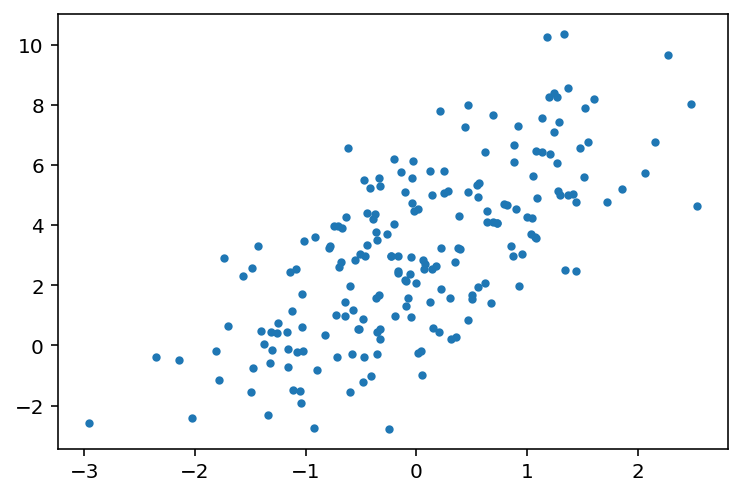

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [2]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[1.96214651]
3.067562466496291


In [3]:
leg.coef_[0]

1.9539242310058054

In [4]:
leg.intercept_

2.7851499270080207

## 회귀직선

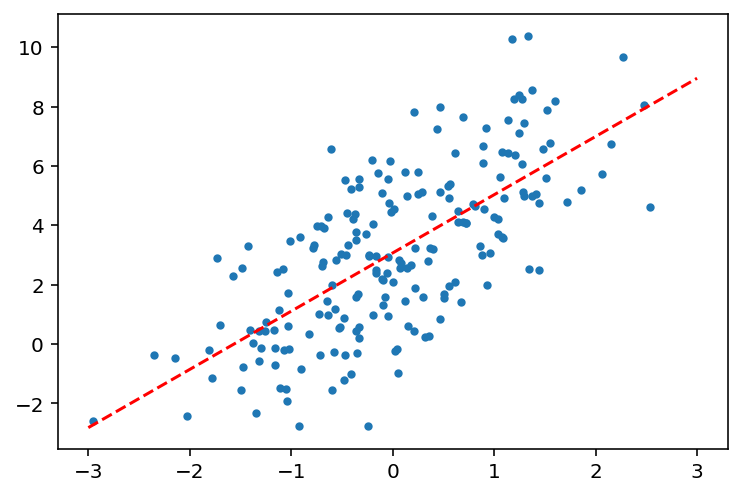

In [3]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 2)
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

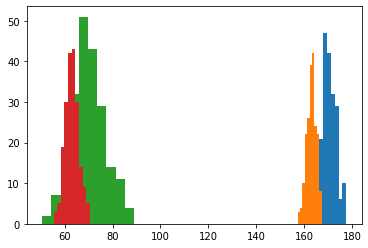

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200 #  사람수 남여, 각각 200명 (총 400명)
x1 = 3*np.random.randn(n_samples) + 170 # 남성의 키
x2 = 2*np.random.randn(n_samples) + 163 # 여성의 키

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 남성 몸무게
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 여성 몸무게
plt.hist(x1)
plt.hist(x2)

plt.hist(y1)
plt.hist(y2)
plt.show()

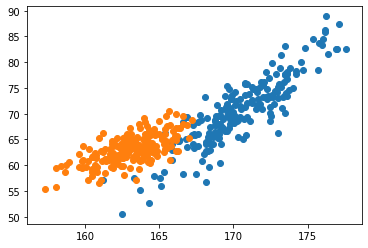

In [2]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)

In [3]:
p = [1,2,3,4,5,6,7,8,9,10]
p_train, p_test= train_test_split(p, test_size=0.2, random_state=9)                                             
p_train, p_test

([8, 3, 2, 10, 4, 1, 7, 6], [9, 5])

In [4]:
p = [1,2,3,4,5,6,7,8,9,10]
q = [11,12,13,14,15,16,17,18,19,20]
p_train, p_test, q_train, q_test = train_test_split(p, q, 
            test_size=0.2, random_state=90)                                             
p_train, p_test, q_train, q_test

([1, 7, 6, 10, 5, 8, 4, 3], [9, 2], [11, 17, 16, 20, 15, 18, 14, 13], [19, 12])

In [5]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측 (x1  --> y1 예측하는 모델)
X_train, X_test, y_train, y_test = train_test_split(x2, y2, random_state=42)
model = LinearRegression()  # (1) 모델 생성
model.fit(X_train.reshape(-1,1), y_train) # (2) 모델 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
model.coef_ , model.intercept_

(array([0.9221763]), -87.34154407347398)

In [7]:
# R-square 점수 (남성)
model.score(X_test.reshape(-1,1), y_test) # (3) 채점

0.5200621815667144

In [8]:
# 여성의 경우
model.score(X_test.reshape(-1,1), y_test) # (3) 채점

0.5200621815667144

In [9]:
X_train.shape, X_test.shape

((150,), (50,))

### 연습
- R2 가 0.9이상이 되도록 남성의 몸무게 생성 코드를 수정
- 여성 데이터만 사용하여 키로부터 몸무게 예측 (x2  --> y2 예측하는 모델) R2? (톡방에..)

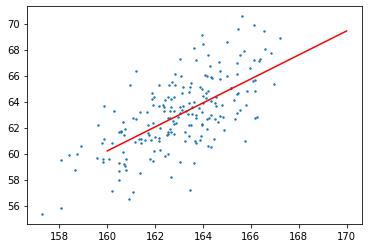

In [10]:
xs = np.linspace(160,170,2)
ys = xs * model.coef_[0] + model.intercept_
plt.scatter(x2, y2, s=2)
plt.plot(xs, ys, c='r')

## 셀 나누기는 shift ctrl "-"

## 남여 데이터를 합친 데이터 (400명)

In [11]:
x = np.concatenate((x1, x2)) # np.hstack((x1,x2))
y = np.concatenate((y1, y2))

In [12]:
x.shape, y.shape

((400,), (400,))

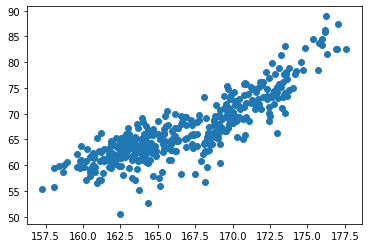

In [13]:
plt.scatter(x,y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.7869191543845362

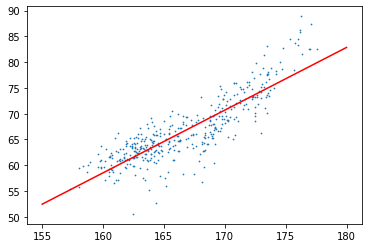

In [15]:
xs = np.linspace(155,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [16]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,167.416760,0
1,171.506483,0
2,168.783313,0
3,163.739389,0
4,174.804307,0
...,...,...
395,160.186578,1
396,162.388961,1
397,160.564035,1
398,163.458923,1


In [17]:
# sex = [0]*n_samples + [1]*n_samples ; sex

In [18]:
# X = pd.DataFrame(x)
# X['sex'] = sex
# X

In [19]:
np.random.seed(90)
X_train, X_test, y_train, y_test = train_test_split(X, y)
leg = LinearRegression() # (1)
leg.fit(X_train, y_train) # (2)
leg.score(X_test, y_test) # (3)

0.7412125581324542

## 성별을 고려하여 성능이 개선됨

In [20]:
print(leg.coef_)
print(leg.intercept_)

[1.69926478 4.90951557]
-218.88531885910095


In [21]:
a1, a2 = leg.coef_[0], leg.coef_[1]
b = leg.intercept_

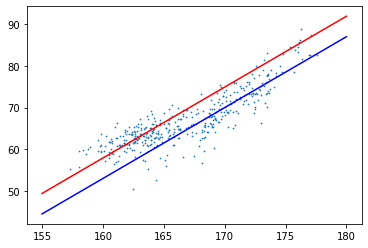

In [22]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
# 남성의 경우
ys = a1*xs + a2*0 + b
plt.plot(xs, ys, c='b')
# 여성의 경우
ys = a1*xs + a2*1 + b
plt.plot(xs, ys, c='r')

### 남성을 0으로 여성을 1로 인코딩하면 결과가 달라지나?
- R-square 값 비교하기

# 선형 분류

In [23]:
X["weight"] = y
X[:10]

,height,sex,weight
0,167.416760,0,65.842584
1,171.506483,0,74.750682
2,168.783313,0,68.539124
3,163.739389,0,55.250997
4,174.804307,0,82.784013
5,171.832201,0,76.201977
6,168.623557,0,65.505827
7,170.790607,0,71.245868
8,165.300185,0,58.710444
9,171.243679,0,75.103603


In [24]:
y = X["sex"] ;y[:5]

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [25]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,167.416760,65.842584
1,171.506483,74.750682
2,168.783313,68.539124
3,163.739389,55.250997
4,174.804307,82.784013


In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
clf = SGDClassifier() # (1) 모델 정의
clf.fit(X_train, y_train) #(2) 학습
clf.score(X_test, y_test) # accuracy (정확도)

0.89

In [30]:
X_train.shape, X_test.shape

((300, 2), (100, 2))

In [31]:
y_pred = clf.predict(X_test) # (3) 모델 사용

In [32]:
(y_test.values == y_pred).mean()

0.89

In [33]:
clf.coef_, clf.intercept_

(array([[-16.25101643,   7.50641255]]), array([-0.71211988]))

In [34]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [35]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

In [36]:
m1,m2, s1, s2

(166.6909115429496, 66.75179455499055, 4.435388830501714, 6.320100807173782)

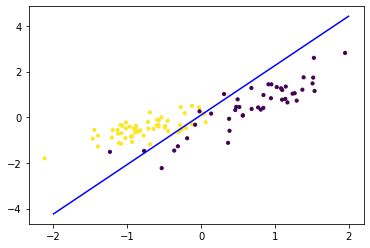

In [37]:
xs = np.linspace(-2,2,2)
plt.scatter(X_test[:,0],X_test[:,1], s=10, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

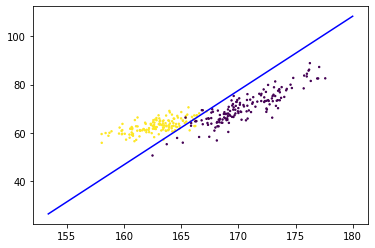

In [38]:
xs = np.linspace(-3,3,2)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

# 컨퓨전 매트릭스

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Accuracy = 정확도 (맞춘 비율)
- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [40]:
confusion_matrix(y_test, y_pred)

array([[41,  4],
       [ 7, 48]])

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       0.92      0.87      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [42]:
scores = clf.decision_function(X_test)

In [43]:
scores

array([ 12.09860629,  20.23822442,  -5.77418596,   1.60823158,
        11.93397537, -13.98335909,   7.63683517,  -1.06767891,
        14.08409407, -11.34685135,  -7.4108959 ,   5.87296453,
         3.81316568,   5.44965151,  -2.8898048 , -17.08196871,
        12.23433949,   1.25496168, -12.38913148,  -0.72301244,
        -8.85579023,   0.75688597,  12.16059817, -16.31767973,
       -11.44001719,  12.36639083,  -1.87371067,  16.07041981,
        -5.0639719 , -11.29574354,  -9.32392072,  14.50707828,
       -13.25952384,   7.98724315,   8.33691823,  -2.20138319,
         8.82377284,  18.62665531,   8.73997376,  -1.73703453,
         7.12445304,  -9.13301566,  11.55900761,  -7.17042082,
         7.12634316,   4.29255374,  -0.91828547,  -7.47372424,
       -14.89045447,  10.74972802,  -3.39446303,   6.39527217,
        13.44043868, -11.3640649 ,  10.32168253,   7.97742559,
         1.93708753,   9.08151067,  -5.90184241,  -9.65030428,
       -15.08437583,   9.4835754 ,   8.09807788,  13.79

In [44]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

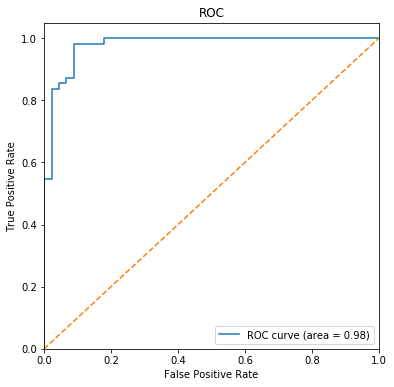

In [45]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # (1)
clf.fit(X_train, y_train) #(2)
clf.score(X_test, y_test)

0.92

In [53]:
y_pred = clf.predict(X_test) ; y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [54]:
score2 = clf.predict_proba(X_test) ; score2[:,1]

array([0.98, 0.55, 0.36, 1.  , 0.99, 0.  , 1.  , 0.59, 0.98, 0.  , 0.  ,
       1.  , 1.  , 0.98, 0.  , 0.  , 1.  , 0.93, 0.  , 0.84, 0.  , 0.85,
       1.  , 0.  , 0.01, 0.99, 0.2 , 1.  , 0.  , 0.  , 0.03, 1.  , 0.  ,
       0.99, 1.  , 0.  , 1.  , 1.  , 1.  , 0.21, 0.83, 0.04, 1.  , 0.  ,
       1.  , 0.99, 0.69, 0.  , 0.  , 1.  , 0.02, 1.  , 1.  , 0.13, 1.  ,
       0.99, 0.93, 1.  , 0.  , 0.  , 0.01, 1.  , 1.  , 1.  , 0.  , 0.13,
       0.33, 0.82, 0.93, 0.99, 0.8 , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.38, 0.  , 0.  , 0.  , 0.96, 1.  , 0.  , 0.02, 0.68,
       1.  , 1.  , 1.  , 0.98, 0.98, 0.95, 0.  , 0.  , 0.83, 1.  , 0.8 ,
       0.82])

In [55]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, score2[:,1])
roc_auc = auc(fpr, tpr)

In [63]:
tpr

array([0.        , 0.09090909, 1.        , 1.        ])

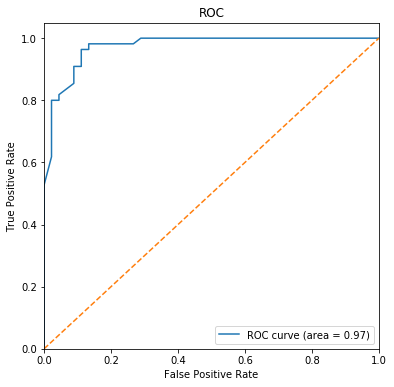

In [56]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) ROC 성능 비교

In [58]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


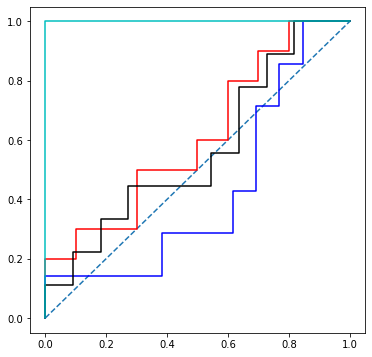

In [61]:
# 3명의 의사 (분류 모델)의 실력을 비교 평가
y_real=[[1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k', 'c']
for i in range(len(y_real)):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])